<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/2_%D0%9B%D0%B0%D0%B1%D0%B0_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8_%D0%B1%D0%B5%D0%B7_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import sys
import seaborn as sns
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import os
import h5py
import PIL
import cv2
import math
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams["figure.figsize"] = (14,8)

#Подготовка данных


In [112]:
input_folder = 'drive/MyDrive/archive/all_letters_image/all_letters_image/'
all_letters_filename = os.listdir(input_folder)
len(all_letters_filename)

14190

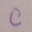

In [113]:
#Это одно из наших изображений. Размер каждого изображения составляет 32 на 32 пикселя.
#Затем мы преобразуем каждое изображение в 3d-массив numpy.
i = Image.open("drive/MyDrive/archive/all_letters_image/all_letters_image/19_102.png")
i

In [114]:
# Функция для преобразования изображения в тензор
# Параметры:
# - img_name: Имя файла изображения
# - input_folder: Путь к папке, где находится изображение
# Возвращает:
# - Тензорное представление изображения
def img_to_array(img_name, input_folder):
    # Загрузка изображения из указанной папки и изменение его размера до 32x32 пикселей
    img = image.load_img(input_folder + img_name, target_size=(32, 32))

    # Преобразование изображения в массив NumPy
    x = image.img_to_array(img)

    # Расширение размерности массива для подготовки его к обработке нейронной сетью
    return np.expand_dims(x, axis=0)

# Функция для преобразования списка имен изображений в тензор
# Параметры:
# - img_names: Список имен файлов изображений
# - input_folder: Путь к папке, где находятся изображения
# Возвращает:
# - Массив NumPy, содержащий тензоры всех изображений из списка
def data_to_tensor(img_names, input_folder):
    # Создание списка тензоров путем применения функции img_to_array к каждому имени изображения
    list_of_tensors = [img_to_array(img_name, input_folder) for img_name in img_names]

    # Стекирование отдельных тензоров вертикально для создания одного массива NumPy
    return np.vstack(list_of_tensors)


In [115]:
# Загрузка данных из CSV-файла в переменную "data"
data = pd.read_csv("drive/MyDrive/archive/all_letters_info.csv")
# Извлечение имен файлов изображений из столбца "file"
image_names = data['file']
letters = data[ 'letter']
backgrounds = data['background'].values
targets = data['label'].values
tensors = data_to_tensor(image_names, input_folder)
tensors[0]

array([[[196., 186., 203.],
        [196., 188., 203.],
        [194., 187., 202.],
        [194., 186., 202.],
        [196., 188., 204.],
        [196., 188., 203.],
        [194., 186., 202.],
        [195., 187., 203.],
        [193., 186., 201.],
        [196., 188., 203.],
        [194., 187., 202.],
        [194., 185., 200.],
        [196., 186., 201.],
        [195., 186., 201.],
        [196., 187., 202.],
        [196., 187., 202.],
        [196., 188., 200.],
        [196., 188., 200.],
        [195., 187., 199.],
        [191., 184., 198.],
        [191., 183., 199.],
        [193., 186., 201.],
        [195., 186., 199.],
        [190., 182., 194.],
        [189., 183., 194.],
        [193., 186., 199.],
        [192., 184., 200.],
        [193., 185., 200.],
        [191., 183., 199.],
        [191., 182., 198.],
        [193., 185., 200.],
        [193., 186., 201.]],

       [[192., 184., 201.],
        [193., 186., 203.],
        [192., 188., 204.],
        [190., 185

In [116]:
# Вывод размера (формы) массива тензоров
print('Форма тензоров:', tensors.shape)
# Вывод размера (формы) массива меток (целевых значений)
print('Форма меток (целевых значений):', targets.shape)

Форма тензоров: (14190, 32, 32, 3)
Форма меток (целевых значений): (14190,)


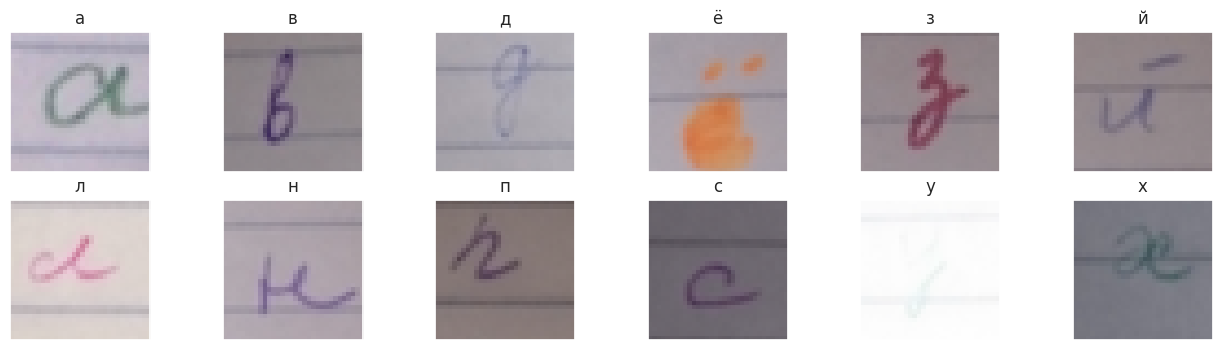

In [117]:
# Функция для отображения изображений из файлов с использованием OpenCV
# Параметры:
# - img_path: Путь к файлу изображения
# - ax: Объект для отображения изображения (область на графике)
def display_images(img_path, ax):
    # Загрузка изображения из указанного пути
    img = cv2.imread(input_folder + img_path)

    # Отображение изображения, преобразовав его из формата BGR в RGB
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Создание графического окна с определенными размерами
fig = plt.figure(figsize=(16, 4))

# Цикл для отображения 12 изображений
for i in range(12):
    # Создание области для каждого изображения внутри графического окна
    ax = fig.add_subplot(2, 6, i + 1, xticks=[], yticks=[], title=letters[i * 100])

    # Вызов функции для отображения изображения с указанным именем файла и заданной областью (ax)
    display_images(image_names[i * 100], ax)

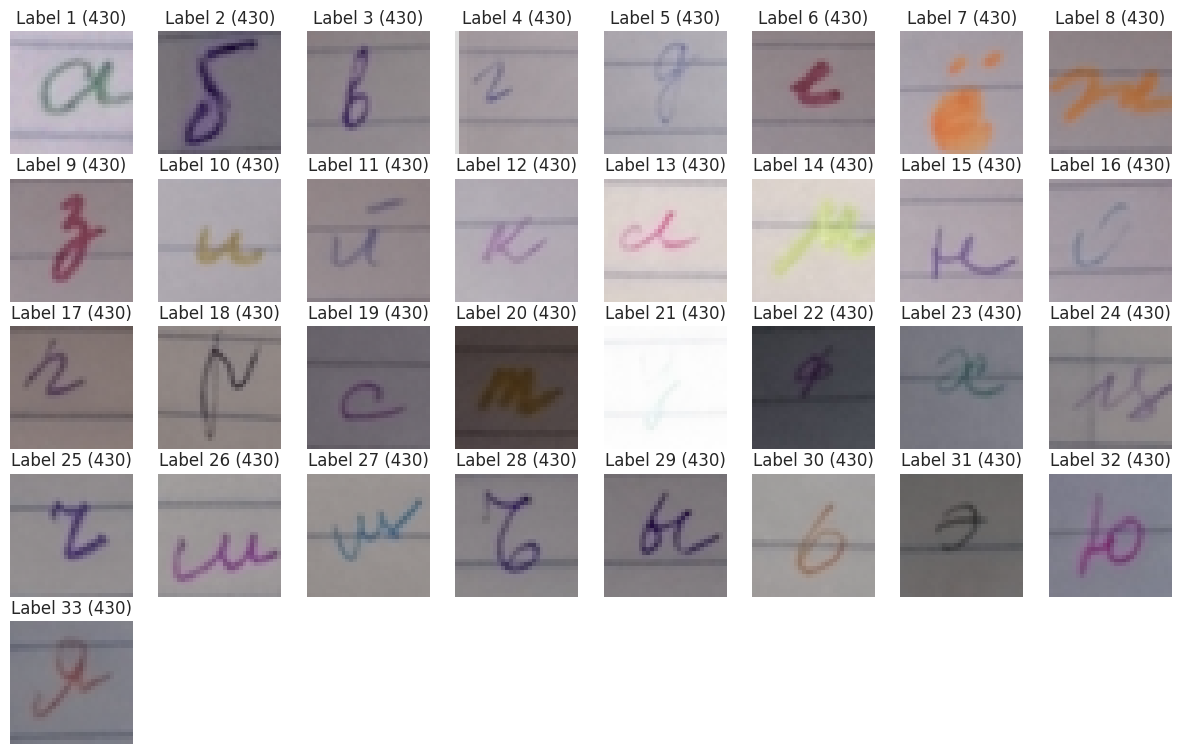

In [118]:
def display_images_and_labels(images, labels):
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    labels = labels.tolist()
    for label in unique_labels:
        # Pick the first image for each label.
        image_index = labels.index(label)
        image = images[image_index]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        display_images(image_names[image_index], plt.gca())
    plt.show()

display_images_and_labels(tensors, targets)


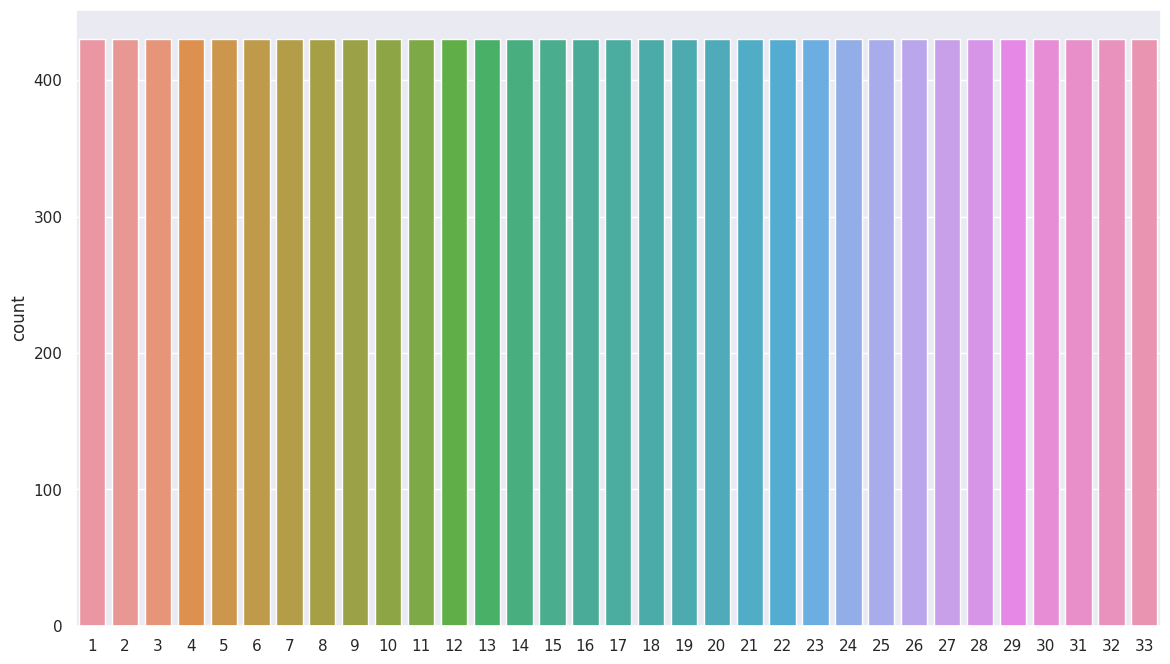

In [119]:
# Создание графика countplot
sns.set(style="darkgrid")
ax = sns.countplot(x=targets)

# Отображение графика
plt.show()

In [120]:
# Нормализация
# Для уменьшения влияния перепадов освещенности мы проводим нормализацию.
X = tensors.astype("float32")/255
# Кроме того, CNN быстрее сходится на данных [0...1], чем на [0...255]. Преобразуем входные данные к типу float, а

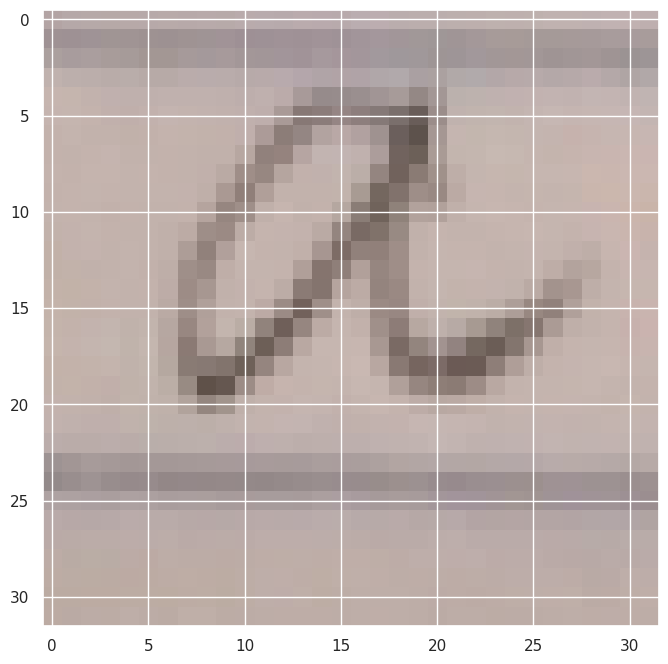

In [121]:
arr = X[2]
arr_ = np.squeeze(arr)
plt.imshow(arr_)
plt.show()

In [122]:
img_rows, img_cols = 32, 32
num_classes = 33

y = targets

def to_categorical(y, num_classes):
    y_one_hot = np.zeros((y.shape[0], num_classes))
    y_one_hot[np.arange(y.shape[0]), y.astype(int)-1] = 1
    return y_one_hot

y = to_categorical(y, num_classes)

print(X.shape)
print(y.shape)

(14190, 32, 32, 3)
(14190, 33)


Grayscaled Tensor shape: (14190, 32, 32)


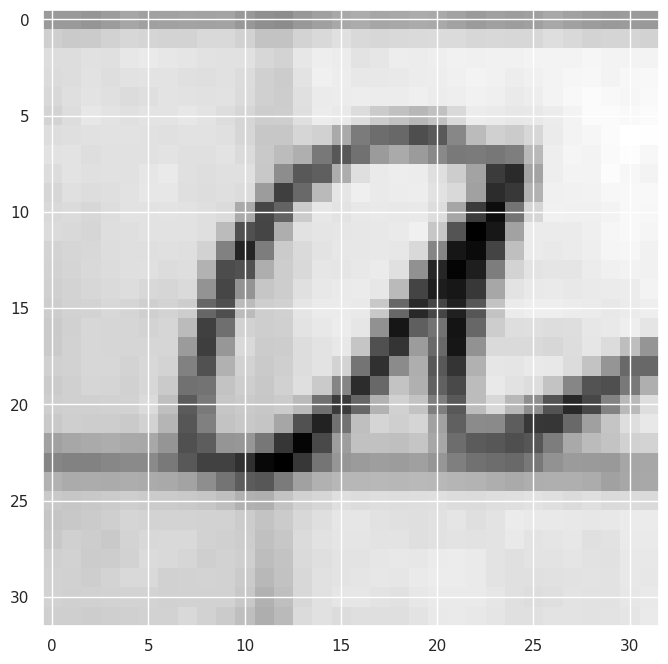

In [123]:
# Тензоры с градацией серого
X_grey = np.dot(X[...,:3], [0.299, 0.587, 0.114])
# X_grey = tf.expand_dims(X_grey, axis=3)
print ('Grayscaled Tensor shape:', X_grey.shape)\

plt.imshow(X_grey[3], cmap=plt.get_cmap("gray"))

#Обучение простой нейронной сети
###Данная нейронная сеть реализована для решения задачи классификации с использованием стохастического градиентного спуска (SGD) и алгоритма обратного распространения ошибки (Backpropagation). Она состоит из трех слоев: входного слоя с 2 нейронами, скрытого слоя с 3 нейронами и выходного слоя с 1 нейроном.

In [124]:
""" ---Раздел описаний--- """
""" --Описание класса Network--"""
class Network(object): # используется для описания нейронной сети
    def __init__(self, sizes): # конструктор класса
# self – указатель на объект класса
# sizes – список размеров слоев нейронной сети
        self.num_layers = len(sizes) # задаем количество слоев нейронной сети
        self.sizes = sizes # задаем список размеров слоев нейронной сети
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]] # задаем случайные начальные смещения
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] # задаем случайные начальные веса связей
    def sigmoid(self,z): # определение сигмоидальной функции активации
        return 1.0/(1.0+np.exp(-z))
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.sigmoid(np.dot(w, a)+b)
        return a
    def SGD( # Стохастический градиентный спуск
        self # указатель на объект класса
        , training_data # обучающая выборка
        , epochs # количество эпох обучения
        , mini_batch_size # размер подвыборки
        , eta # скорость обучения
        , test_data # тестирующая выборка
        ):
        test_data = list(test_data) # создаем список объектов тестирующей выборки
        n_test = len(test_data) # вычисляем длину тестирующей выборки
        training_data = list(training_data) # создаем список объектов обучающей выборки
        n = len(training_data) # вычисляем размер обучающей выборки
        for j in range(epochs): # цикл по эпохам
            random.shuffle(training_data) # перемешиваем элементы обучающей выборки
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)] # создаем подвыборки
            for mini_batch in mini_batches: # цикл по подвыборкам
              #print(len(mini_batch[0][0]))
              self.update_mini_batch(mini_batch, eta) # один шаг градиентного спуска
            print ("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test)) # смотрим прогресс в обучении
    def update_mini_batch( # Шаг градиентного спуска
        self # указатель на объект класса
        , mini_batch # подвыборка
        , eta # скорость обучения
        ):
        nabla_b = [np.zeros(b.shape) for b in self.biases] # список градиентов dC/db для каждого слоя (первоначально заполняются нулями)
        nabla_w = [np.zeros(w.shape) for w in self.weights] # список градиентов dC/dw для каждого слоя (первоначально заполняются нулями)
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y) # послойно вычисляем градиенты dC/db и dC/dw для текущего прецедента (x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)] # суммируем градиенты dC/db для различных прецедентов текущей подвыборки
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)] # суммируем градиенты dC/dw для различных прецедентов текущей подвыборки
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)] # обновляем все веса w нейронной сети
        self.biases = [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)] # обновляем все смещения b нейронной сети
    def backprop( # Алгоритм обратного распространения
        self # указатель на объект класса
      ,x # вектор входных сигналов ,
      ,y # ожидаемый вектор выходных сигналов
      ):
        nabla_b = [np.zeros(b.shape) for b in self.biases] # список градиентов dC/db для каждого слоя (первоначально заполняются нулями)
        nabla_w = [np.zeros(w.shape) for w in self.weights] # список градиентов dC/dw для каждого слоя (первоначально заполняются нулями)
        # определение переменных
        activation = x # выходные сигналы слоя (первоначально соответствует выходным сигналам 1-го слоя или входным сигналам сети)
        activations = [x] # список выходных сигналов по всем слоям (первоначально содержит только выходные сигналы 1-го слоя)
        zs = [] # список активационных потенциалов по всем слоям (первоначально пуст)
        # прямое распространение
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b # считаем активационные потенциалы текущего слоя
            zs.append(z) # добавляем элемент (активационные потенциалы слоя) в конец списка
            activation = self.sigmoid(z) # считаем выходные сигналы текущего слоя, применяя сигмоидальную функцию активации к активационным потенциалам слоя
            activations.append(activation) # добавляем элемент (выходные сигналы слоя) в конец списка
  # обратное распространение
        delta = self.cost_derivative(activations[-1], y) * self.sigmoid_prime(zs[-1]) # считаем меру влияния нейронов выходного слоя L на величину ошибки (BP1)
        nabla_b[-1] = delta # градиент dC/db для слоя L (BP3)
        nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # градиент dC/dw для слоя L (BP4)
        for l in range(2, self.num_layers):
          z = zs[-l] # активационные потенциалы l-го слоя (двигаемся по списку справа налево)
          sp = self.sigmoid_prime(z) # считаем сигмоидальную функцию от активационных потенциалов l-го слоя
          delta = np.dot(self.weights[-l+1].transpose(), delta) * sp # считаем меру влияния нейронов l-го слоя на величину ошибки (BP2)
          nabla_b[-l] = delta # градиент dC/db для l-го слоя (BP3)
          nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())# градиент dC/dw для l-го слоя (BP4)
        return (nabla_b, nabla_w)
    def evaluate(self, test_data): # Оценка прогресса в обучении
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
    def cost_derivative(self, output_activations, y):
        return (output_activations - y.T)
    def sigmoid_prime(self,z):# Производная сигмоидальной функции
      return self.sigmoid(z)*(1-self.sigmoid(z))


In [125]:

# Разделение набора данных на обучающую и тестовую выборки
# X: признаки/входные данные
# y: метки/целевые значения

# Разделение X и y на обучающую и тестовую выборки с размером тестовой выборки 10%
# random_state=1 гарантирует воспроизводимость результатов
X_train_whole, X_test, y_train_whole, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Дальнейшее разделение обучающей выборки на обучающую и проверочную выборки
# X_train_whole: полный набор признаков обучающей выборки
# y_train_whole: полный набор меток обучающей выборки

# Разделение X_train_whole и y_train_whole на обучающую и проверочную выборки с размером проверочной выборки 10%
# random_state=1 гарантирует воспроизводимость результатов
X_train, X_val, y_train, y_val = train_test_split(X_train_whole, y_train_whole, test_size=0.1, random_state=1)

In [126]:

# Создание генератора данных для аугментации изображений
datagen = ImageDataGenerator(
    featurewise_center=False,  # установить среднее значение входных данных равным 0 по всему набору данных
    samplewise_center=False,  # установить среднее значение каждого отдельного образца/изображения равным 0
    featurewise_std_normalization=False,  # нормализовать входные данные путем деления на стандартное отклонение набора данных
    samplewise_std_normalization=False,  # нормализовать каждый вход путем деления на его стандартное отклонение
    zca_whitening=False,  # применить ZCA-отбеливание
    rotation_range=10,  # случайное вращение изображений в заданном диапазоне (градусы, от 0 до 180)
    zoom_range=0.1,  # случайное изменение масштаба изображения
    width_shift_range=0.1,  # случайное смещение изображений по горизонтали (доля от общей ширины)
    height_shift_range=0.1,  # случайное смещение изображений по вертикали (доля от общей высоты)
    horizontal_flip=False,  # случайное отражение изображений по горизонтали
    vertical_flip=False)  # случайное отражение изображений по вертикали

# Подготовка генератора к обучающему набору данных
datagen.fit(X_train)

In [127]:
class DeepRUModel:
    def __init__(self):
        # Параметры модели
        self.weights = {}
        self.biases = {}

        # Первый слой свертки
        self.weights['conv1'] = np.random.randn(32, 3, 5, 5) / np.sqrt(32 * 5 * 5)
        self.biases['conv1'] = np.zeros(32)

        self.weights['conv2'] = np.random.randn(32, 32, 5, 5) / np.sqrt(32 * 5 * 5)
        self.biases['conv2'] = np.zeros(32)

        # Второй слой свертки
        self.weights['conv3'] = np.random.randn(64, 32, 3, 3) / np.sqrt(64 * 3 * 3)
        self.biases['conv3'] = np.zeros(64)

        self.weights['conv4'] = np.random.randn(64, 64, 3, 3) / np.sqrt(64 * 3 * 3)
        self.biases['conv4'] = np.zeros(64)

        # Полносвязные слои
        self.weights['fc1'] = np.random.randn(64 * 8 * 8, 256) / np.sqrt(64 * 8 * 8)
        self.biases['fc1'] = np.zeros(256)

        self.weights['fc2'] = np.random.randn(256, 33) / np.sqrt(256)
        self.biases['fc2'] = np.zeros(33)

    def relu(self, x):
        return np.maximum(0, x)

    def compile(self, optimizer, loss, metrics):
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = metrics

    def train(self, datagen, X_train, y_train, epochs):
        train_generator = datagen.flow(X_train, y_train, batch_size=90)
        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward(X_train)
            # Compute loss
            loss = self.compute_loss(predictions, y_train)
            # Backward pass
            gradients = self.backward(predictions, y_train)
            # Update weights using the optimizer
            self.weights = self.optimizer.update(gradients)
            # Print or log metrics (accuracy, etc.) based on your requirements
            accuracy = self.compute_accuracy(predictions, y_train)
            print(f"Epoch {epoch + 1}, Loss: {loss}, Accuracy: {accuracy}")

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, x):
        # Первый слой свертки
        conv1 = self.relu(np.sum(np.array([self.convolution(x, self.weights['conv1'][i], self.biases['conv1'][i]) for i in range(32)]), axis=0))
        conv2 = self.relu(np.sum(np.array([self.convolution(conv1, self.weights['conv2'][i], self.biases['conv2'][i]) for i in range(32)]), axis=0))
        maxpool1 = self.max_pooling(conv2, pool_size=(2, 2))
        dropout1 = self.dropout(maxpool1, 0.25)

        # Второй слой свертки
        conv3 = self.relu(np.sum(np.array([self.convolution(dropout1, self.weights['conv3'][i], self.biases['conv3'][i]) for i in range(64)]), axis=0))
        conv4 = self.relu(np.sum(np.array([self.convolution(conv3, self.weights['conv4'][i], self.biases['conv4'][i]) for i in range(64)]), axis=0))
        maxpool2 = self.max_pooling(conv4, pool_size=(2, 2))
        dropout2 = self.dropout(maxpool2, 0.25)

        # Полносвязные слои
        flatten = dropout2.reshape(-1, 64 * 8 * 8)
        fc1 = self.relu(np.dot(flatten, self.weights['fc1']) + self.biases['fc1'])
        dropout3 = self.dropout(fc1, 0.5)
        fc2 = np.dot(dropout3, self.weights['fc2']) + self.biases['fc2']

        return fc2

    def convolution(self, input_volume, kernel, bias):
        return np.sum(np.array([self.convolve2d(input_volume[:, :, i], kernel[i]) for i in range(input_volume.shape[2])]), axis=0) + bias

    def convolve2d(self, input_slice, kernel):
        return np.sum(np.multiply(input_slice, kernel))

    def max_pooling(self, input_volume, pool_size):
        result = np.zeros((input_volume.shape[0] // pool_size[0], input_volume.shape[1] // pool_size[1], input_volume.shape[2]))
        for i in range(0, input_volume.shape[0], pool_size[0]):
            for j in range(0, input_volume.shape[1], pool_size[1]):
                for k in range(input_volume.shape[2]):
                    result[i // pool_size[0], j // pool_size[1], k] = np.max(input_volume[i:i + pool_size[0], j:j + pool_size[1], k])
        return result

    def dropout(self, x, p):
        mask = (np.random.rand(*x.shape) < p) / (1 - p)
        return x * mask

# Создание экземпляра модели
deep_ru_model = DeepRUModel()


In [128]:
class RMSpropOptimizer:
    def __init__(self, learning_rate=0.001, rho=0.9, epsilon=1e-08):
        self.learning_rate = learning_rate
        self.rho = rho
        self.epsilon = epsilon
        self.cache = None

    def update(self, gradients):
        if self.cache is None:
            self.cache = np.zeros_like(gradients)

        self.cache = self.rho * self.cache + (1 - self.rho) * gradients**2
        update = -self.learning_rate * gradients / (np.sqrt(self.cache) + self.epsilon)

        return update

optimizer = RMSpropOptimizer(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [129]:
deep_ru_model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [130]:
class ReduceLROnPlateau:
    def __init__(self, monitor='val_acc', patience=3, factor=0.5, min_lr=0.00001, verbose=0):
        self.monitor = monitor
        self.patience = patience
        self.factor = factor
        self.min_lr = min_lr
        self.verbose = verbose
        self.wait = 0
        self.best_score = float('inf') if 'acc' not in monitor else float('-inf')

    def on_epoch_end(self, epoch, current_score):
        if self.monitor == 'val_acc':
            current_score = 1 - current_score  # Invert accuracy to use for monitoring
        if current_score < self.best_score:
            self.best_score = current_score
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = max(self.min_lr, self.factor * self.learning_rate)
                self.learning_rate = new_lr
                if self.verbose > 0:
                    print(f'\nEpoch {epoch + 1}: Reducing learning rate to {new_lr}')
                self.wait = 0


In [131]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [132]:
class EarlyStopping:
    def __init__(self, monitor='val_accuracy', mode='max', verbose=0, patience=50):
        self.monitor = monitor
        self.mode = mode
        self.verbose = verbose
        self.patience = patience
        self.wait = 0
        self.best_score = float('-inf') if mode == 'max' else float('inf')
        self.stopped_epoch = 0
        self.stopped = False

    def should_stop(self, current_score, epoch):
        if (self.mode == 'max' and current_score > self.best_score) or (self.mode == 'min' and current_score < self.best_score):
            self.best_score = current_score
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                if self.verbose > 0:
                    print(f'\nEarly stopping at epoch {epoch + 1}')
                self.stopped_epoch = epoch
                self.stopped = True

        return self.stopped


In [133]:
import shutil

class ModelCheckpoint:
    def __init__(self, filename, monitor='val_accuracy', mode='max', verbose=1):
        self.filename = filename
        self.monitor = monitor
        self.mode = mode
        self.verbose = verbose
        self.best_score = float('-inf') if mode == 'max' else float('inf')

    def save(self, model, current_score):
        if (self.mode == 'max' and current_score > self.best_score) or (self.mode == 'min' and current_score < self.best_score):
            if self.verbose > 0:
                print(f'\nSaving best model with {self.monitor}: {current_score}')
            self.best_score = current_score
            shutil.copy(model, self.filename)

In [134]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50)


In [135]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1)

In [136]:
from sklearn.model_selection import train_test_split

# Разделение X на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Разделение X_train на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

# Создание генератора данных для аугментации изображений
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    preprocessing_function=None
)

# Подготовка генератора к обучающему набору данных
datagen.fit(X_train)

# Создание генератора данных с преобразованием меток в one-hot encoding
train_generator = datagen.flow(X_train, to_categorical(y_train, num_classes), batch_size=90)

# Обучение модели
your_number_of_epochs = 10
deep_ru_model.train(datagen, X_train, to_categorical(y_train, num_classes), epochs=your_number_of_epochs)



IndexError: ignored